In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
df= pd.DataFrame({
    'Study_Hours': [2, 4, 6, 8, 1, 5, 7, 3, 9,2],
    'Attendance': [60, 70, 80, 90, 50, 75, 85, 65, 95, 55],
    'Previous_Marks': [40, 50, 65, 75, 35, 60, 70, 45, 85,38],
    'Result': [0, 0, 1, 1, 0, 1, 1, 0, 1,0]
})

In [8]:
X=df[['Study_Hours', 'Attendance', 'Previous_Marks']]
y=df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
ann= MLPClassifier(hidden_layer_sizes=(5,), 
                   activation='relu', max_iter=3000, random_state=42)
ann.fit(X_train, y_train)
y_pred= ann.predict(X_test)

In [10]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 1.0


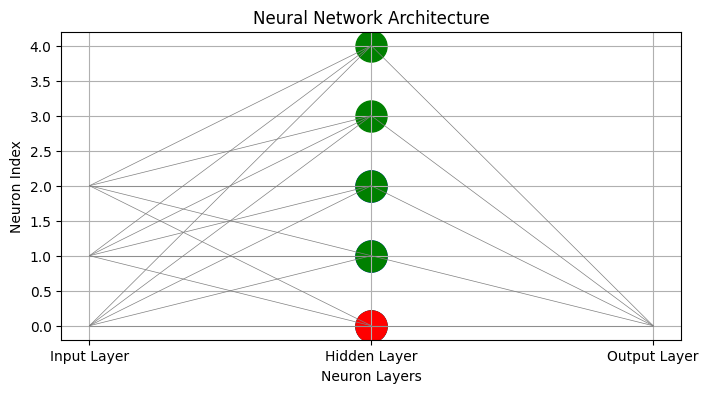

In [ ]:
import matplotlib.pyplot as plt

input_neurons = 3
hidden_neurons = 5
output_neurons = 1
input_y=range(input_neurons)
hidden_y=range(hidden_neurons)
output_y=range(output_neurons)
plt.figure(figsize=(8, 4))

for y in input_y:
    plt.scatter(1, y, s=500, c='blue')

for y in hidden_y:
    plt.scatter(1, y, s=500, c='green')

for y in output_y:
    plt.scatter(1, y, s=500, c='red')

for i in input_y:
    for h in hidden_y:
        plt.plot([0, 1], [i, h], c='gray', linewidth=0.5)
for h in hidden_y:
    for o in output_y:
        plt.plot([1, 2], [h, o], c='gray', linewidth=0.5)
plt.xticks([0, 1, 2], ['Input Layer', 'Hidden Layer', 'Output Layer'])
plt.xlabel('Neuron Layers')
plt.ylabel('Neuron Index')
plt.title('Neural Network Architecture')
plt.grid(True)
plt.show()